# O Método de Newton para Minimização e um Fractal a Respeito

### Abel Soares Siqueira - abelsiqueira@ufpr.br

##### Seminários Poincaré - 20 de Novembro de 2015

# Equações não-lineares

O problema de equações não-lineares, consiste em achar uma tupla
de valores que satisfaz um conjunto de equações.

$$ \left\{\begin{array}{rcl}
x_1^2 + x_2^2 & = & 4 \\
x_1x_2 & = & 1
\end{array}\right.
$$

$$ \left\{\begin{array}{rcl}
x_1^2 + x_2^2 - e^{x_1+x_2} & = & 1 \\
\sqrt{1+x_2} + \frac{1}{x_2^2+1} & = & 1
\end{array}\right.
$$

$$ \left\{\begin{array}{rcl}
x_1x_2x_3 & = & 1 \\
x_1x_2 + x_1x_3 + x_2x_3 & = & 3 \\
x_1 + x_2 + x_3 & = & 3
\end{array}\right.
$$

De maneira geral escrevemos $ F(x) = 0 $, onde $ F:\mathbb{R}^n \rightarrow \mathbb{R}^n $.


$$ \left\{\begin{array}{rcl}
x_1^2 + x_2^2 & = & 4 \\
x_1x_2 & = & 1
\end{array}\right. \qquad \Rightarrow \qquad
F(x) = \left[\begin{array}{c}
x_1^2 + x_2^2 - 4 \\
x_1x_2 - 1
\end{array}\right].
$$

$$ \left\{\begin{array}{rcl}
x_1^2 + x_2^2 & = & 4 \\
x_1x_2 & = & 1
\end{array}\right. $$

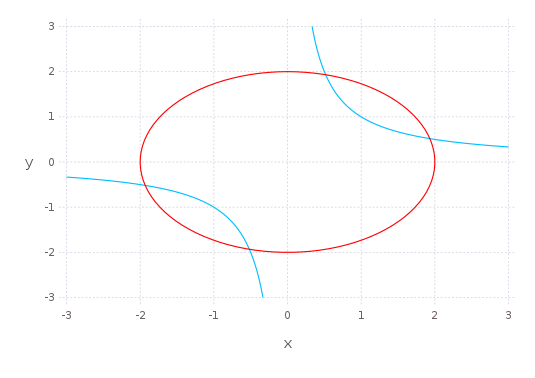

In [7]:
using Gadfly

t = linspace(-2.9, 2.9, 100)
t = linspace(0, 2pi, 100)
x = linspace(1/3, 3, 100); y = 1./x;
Gadfly.plot(layer(x = 2*sin(t), y = 2*cos(t), Geom.path, Theme(default_color=colorant"red")),
layer(x=x, y=y, Geom.path),
layer(x=-x, y=-y, Geom.path))

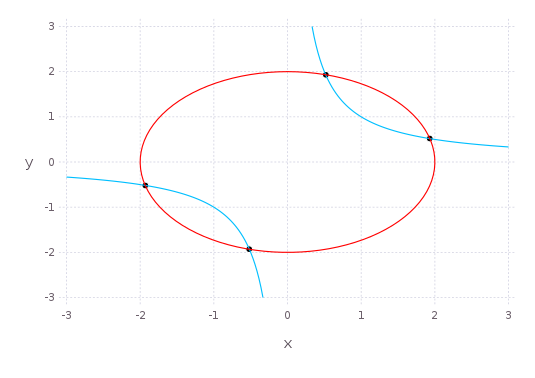

In [8]:
t = linspace(-2.9, 2.9, 100)
t = linspace(0, 2pi, 100)
x = linspace(1/3, 3, 100); y = 1./x;
Gadfly.plot(layer(x = 2*sin(t), y = 2*cos(t), Geom.path, Theme(default_color=colorant"red")),
layer(x=x, y=y, Geom.path),
layer(x=-x, y=-y, Geom.path),
layer(x=[1.93;0.52;-1.93;-0.52], y=[0.52;1.93;-0.52;-1.93], Geom.point, Theme(default_color=colorant"black")))

## Aproximação Linear

Sendo $F$ diferenciável, definimos sua aproximação linear
$$ F(x) \approx L(x) = F(a) + F'(a)(x-a) $$
que satisfaz
$$ F(a) = L(a) \qquad F'(a) = L'(a) $$
Para
$$ F(x) = \left[\begin{array}{c}
x_1^2 + x_2^2 -4 \\ x_1x_2 -1
\end{array}\right]
\qquad
F'(x) = \left[\begin{array}{cc}
2x_1 & 2x_2 \\ x_2 & x_1
\end{array}\right]
$$
Para $a = (2,1)$.
$$ F(a) = \left[\begin{array}{c}
1 \\ 1
\end{array}\right]
\qquad
F'(a) = \left[\begin{array}{cc}
4 & 2 \\ 1 & 2
\end{array}\right]
$$
$$ L(x) = \left[\begin{array}{c}
4x_1 + 2x_2 - 9 \\ x_1 + 2x_2 - 3
\end{array}\right] $$
Agora resolvemos $L(x) = 0$.

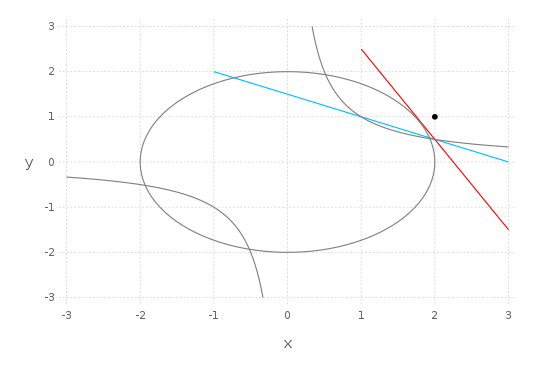

In [9]:
using Gadfly

t = linspace(-2.9, 2.9, 100)
t = linspace(0, 2pi, 100)
x = linspace(1/3, 3, 100); y = 1./x;
Gadfly.plot(layer(x = 2*sin(t), y = 2*cos(t), Geom.path, Theme(default_color=colorant"gray")),
layer(x=x, y=y, Geom.path, Theme(default_color=colorant"gray")),
layer(x=-x, y=-y, Geom.path, Theme(default_color=colorant"gray")),
layer(x=[1;3], y=(9-4*[1;3])/2, Geom.path, Theme(default_color=colorant"red")),
layer(x=[-1;3], y=(3-[-1;3])/2, Geom.path),
layer(x=[2], y=[1], Geom.point, Theme(default_color=colorant"black")))

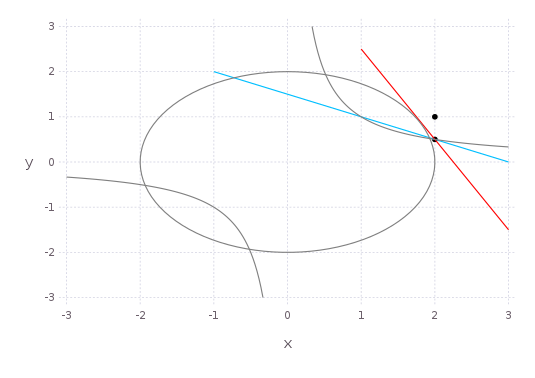

In [10]:
using Gadfly

t = linspace(-2.9, 2.9, 100)
t = linspace(0, 2pi, 100)
x = linspace(1/3, 3, 100); y = 1./x;
Gadfly.plot(layer(x = 2*sin(t), y = 2*cos(t), Geom.path, Theme(default_color=colorant"gray")),
layer(x=x, y=y, Geom.path, Theme(default_color=colorant"gray")),
layer(x=-x, y=-y, Geom.path, Theme(default_color=colorant"gray")),
layer(x=[1;3], y=(9-4*[1;3])/2, Geom.path, Theme(default_color=colorant"red")),
layer(x=[-1;3], y=(3-[-1;3])/2, Geom.path),
layer(x=[2;2], y=[1;0.5], Geom.point, Theme(default_color=colorant"black")))

## O método de Newton

  1. Dado $x^0$, faça $k = 0$
  2. Encontre $L_k$, aproximação linear de $F$ em torno do ponto $x^k$
  3. Defina $x^{k+1}$ como a solução de $L_k(x) = 0$
  4. Incremente $k$ e volte ao passo 2

$$ L_k(x) = F(x^k) + F'(x^k)(x-x^k) $$

$$ L_k(x^{k+1}) = 0 \Rightarrow
F(x^k) + F'(x^k)(x^{k+1}-x^k) = 0. $$

$$ x^{k+1} = x^k - [F'(x^k)]^{-1}F(x^k). $$

$$ d^k = - [F'(x^k)]^{-1}F(x^k) \qquad x^{k+1} = x^k + d^k. $$

## O método de Newton

  1. Dado $x^0$, faça $k = 0$
  2. Faça $x^{k+1} = x^k - [F'(x^k)]^{-1}F(x^k)$
  3. Incremente $k$ e volte ao passo 2

In [13]:
F(x) = [x[1]^2+x[2]^2-4; x[1]*x[2]-1];
J(x) = [2*x[1] 2*x[2]; x[2] x[1]];
x = [2.0; 1.0];

In [20]:
x = [2.0;1.0];
rnd(x) = round(x,5)
println("x = $(rnd(x)), F(x) = $(F(x))")
x = x - J(x)\F(x)
println("x = $(rnd(x)), F(x) = $(rnd(F(x)))")
x = x - J(x)\F(x)
println("x = $(rnd(x)), F(x) = $(rnd(F(x)))")
x = x - J(x)\F(x)
println("x = $(rnd(x)), F(x) = $(rnd(F(x)))")

x = [2.0,1.0], F(x) = [1.0,1.0]
x = [2.0,0.5], F(x) = [0.25,0.0]
x = [1.93333,0.51667], F(x) = [0.00472,-0.00111]
x = [1.93185,0.51764], F(x) = [0.0,-0.0]


## Otimização

$$ \min f(x) \qquad f:\mathbb{R}^n\rightarrow\mathbb{R}, f \in C^2 $$

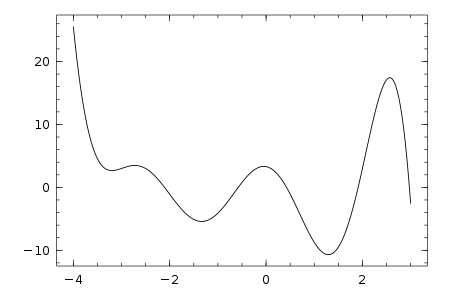

In [28]:
using Winston
f(x) = (x-2).*(x-0.1).*(x+2.5).*(x+3).*sin(x+0.2) + 3
t = linspace(-4,3,200)
Winston.plot(t, f(t))

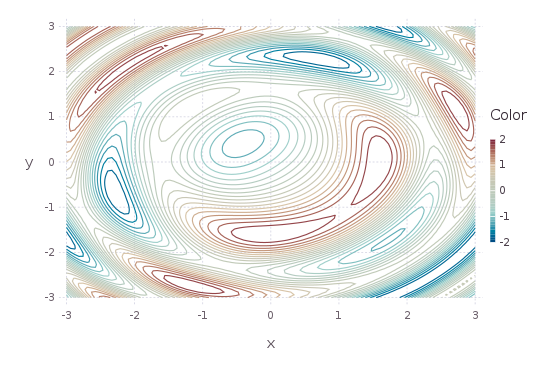

In [67]:
f(x,y) = sin(x-y) + sin(x^2+y^2-1)
x = linspace(-3,3,100); y = linspace(-3,3,100);
Gadfly.plot(x=x, y=y, z=(x,y)->f(x,y), Geom.contour(levels=20))

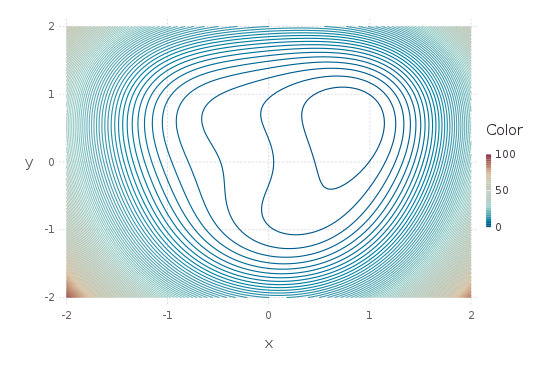

In [122]:
a = 16
f(x,y) = (x^2 + y^2-1)^2 + (y - x^2)^2 + (x-1)^2
x = linspace(-2,2,100); y = linspace(-2,2,100);
Gadfly.plot(x=x, y=y, z=(x,y)->f(x,y), Geom.contour(levels=100))

  - CN1: Se $x^*$ é minimizador local de $f$, então $\nabla f(x^*) = 0$.
  - CN2: Se $x^*$ é minimizador local de $f$, então $\nabla f(x^*) = 0$ e $\nabla^2 f(x^*)$ é semidefinida positiva.
  - CS2: Se $\nabla f(x^*) = 0$ e $\nabla^2 f(x^2)$ é definida positiva, então $x^*$ é minimizador local estrito.

Podemos aplicar o método de Newton para $F(x) = \nabla f(x)$.
$$ F'(x) = \nabla^2 f(x) $$

$$ \nabla^2 f(x^k)d^k = -\nabla f(x^k) \qquad x^{k+1} = x^k + d^k $$

$$ \nabla^2 f(x^k)d + \nabla f(x^k) = 0 = \nabla m_k(d). $$

$$ m_k(d) = \frac{1}{2}d^T \nabla^2 f(x^k)d + \nabla f(x^k)^Td + f(x^k) $$

$$ d^k = \arg\min_d \quad m_k(d) $$
$$ x^{k+1} = \arg\min_x \quad m(x-x^k). $$

In [ ]:
f(x,y) = (1-x[1])^2 + 4*
x = linspace(-2,2,100); y = linspace(-2,2,100);
Gadfly.plot(x=x, y=y, z=(x,y)->f(x,y), Geom.contour(levels=100))